In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('~/workspace/datasets/diabetes_data_upload_kaggle_early_stage.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


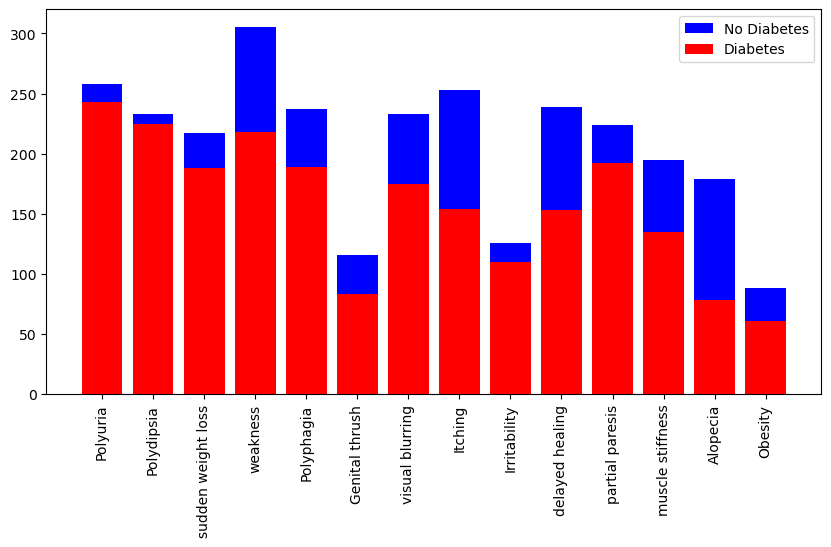

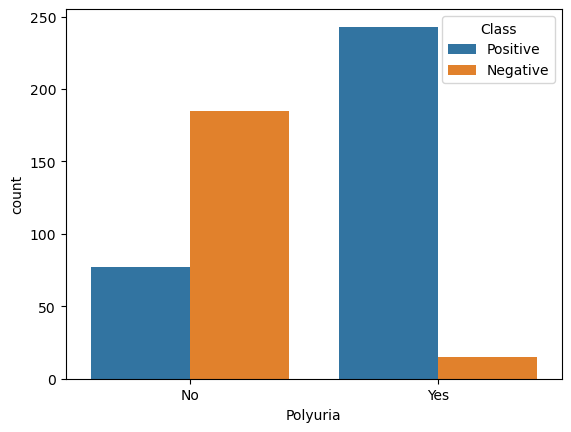

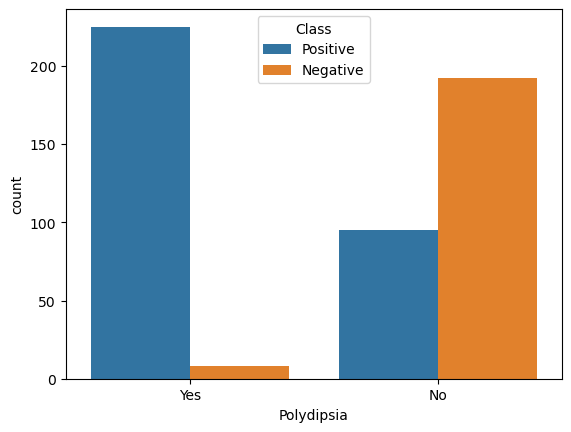

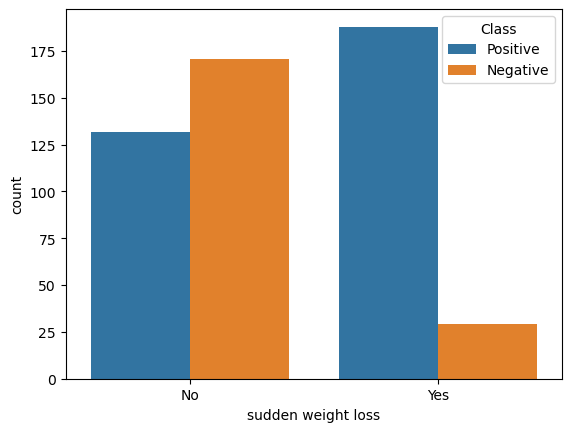

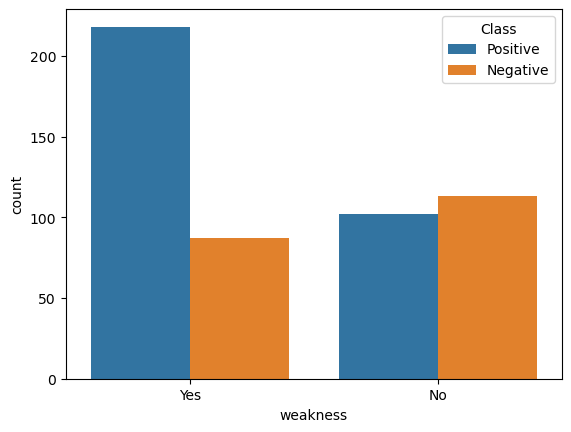

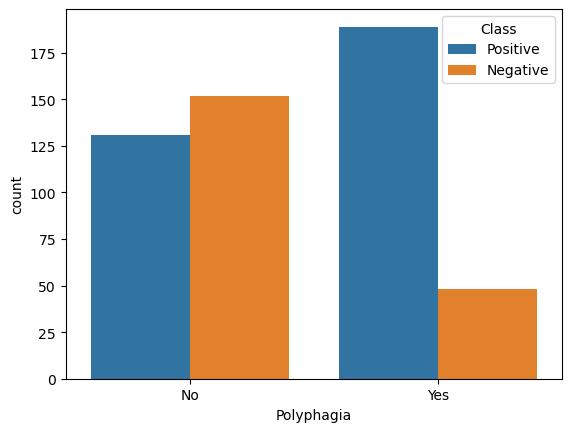

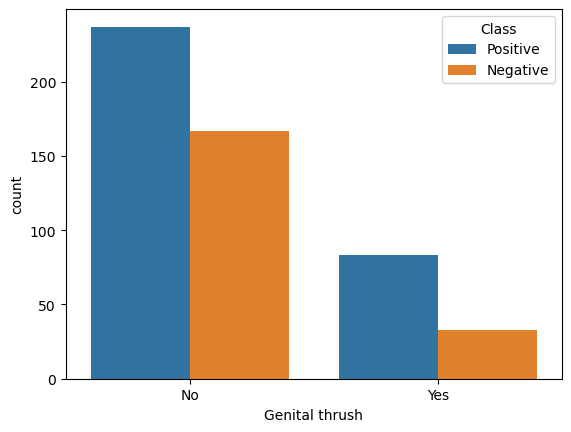

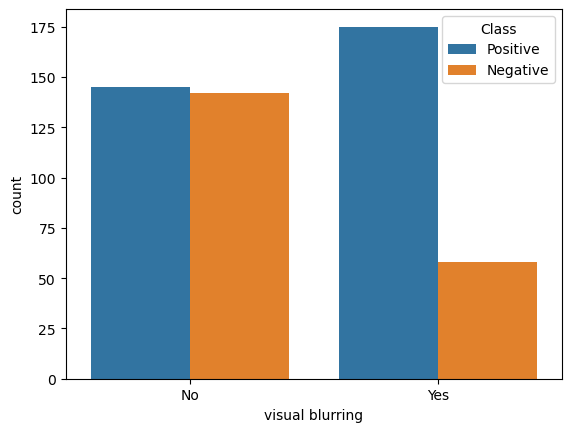

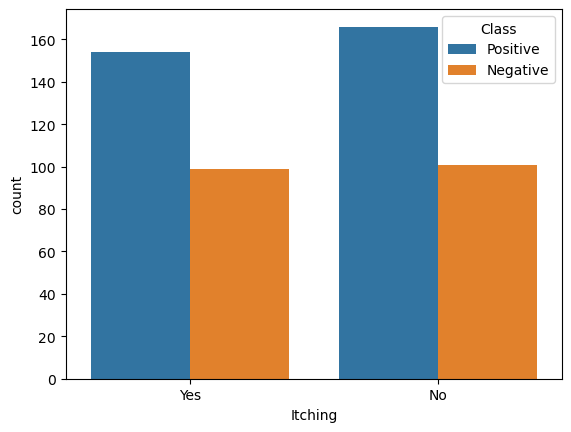

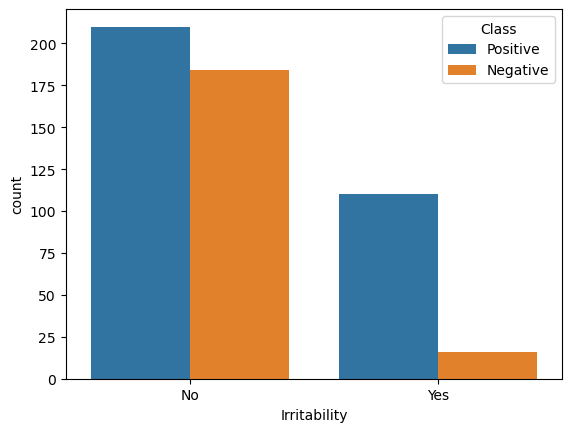

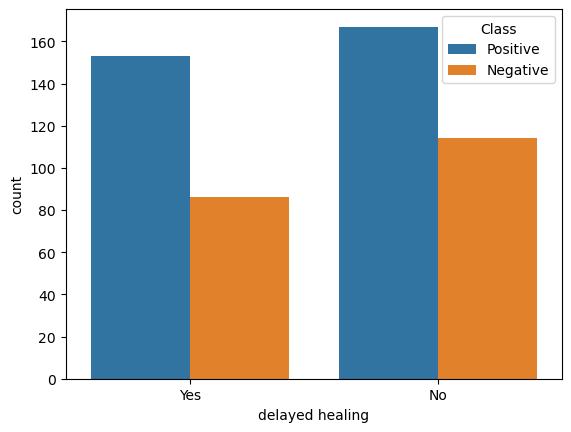

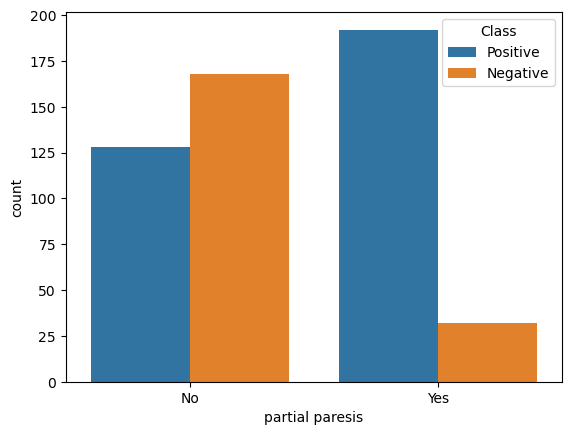

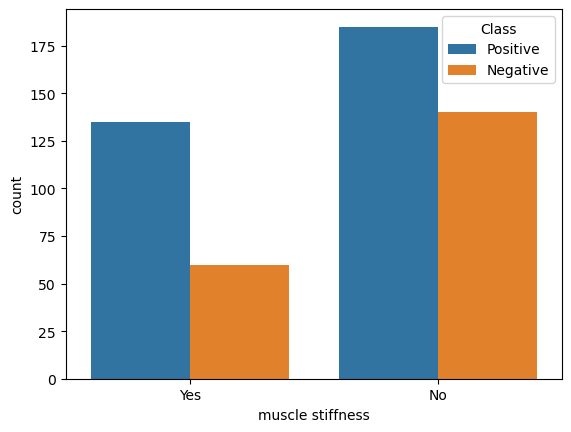

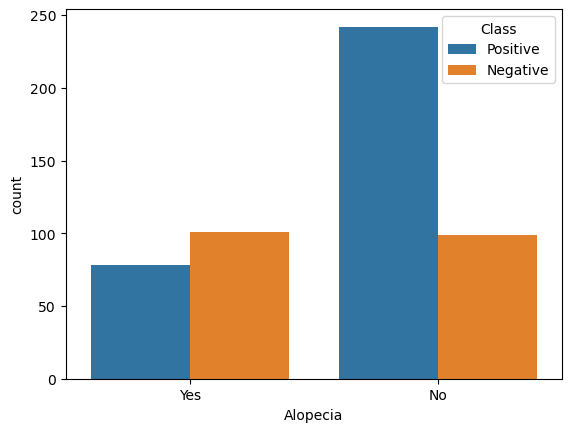

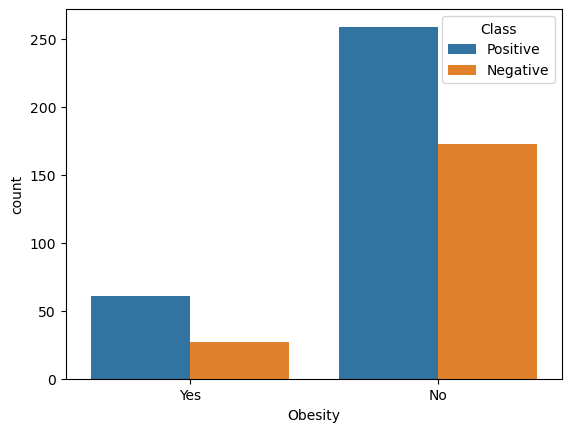

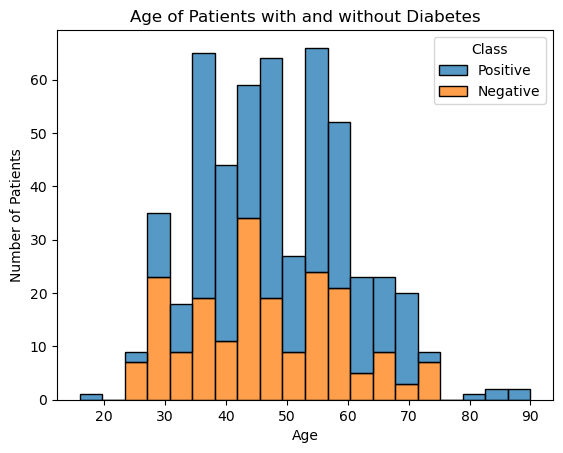

Positive    320
Negative    200
Name: Class, dtype: int64


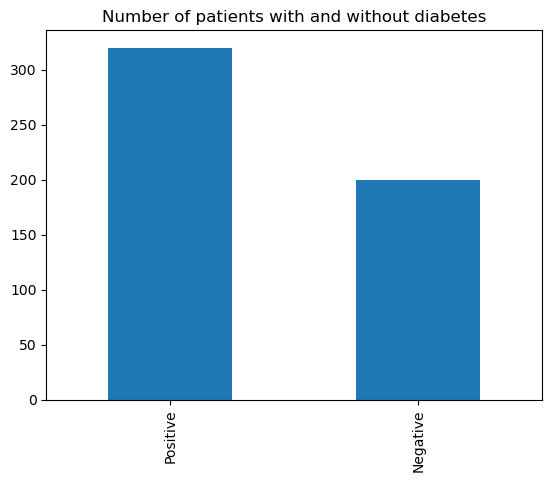

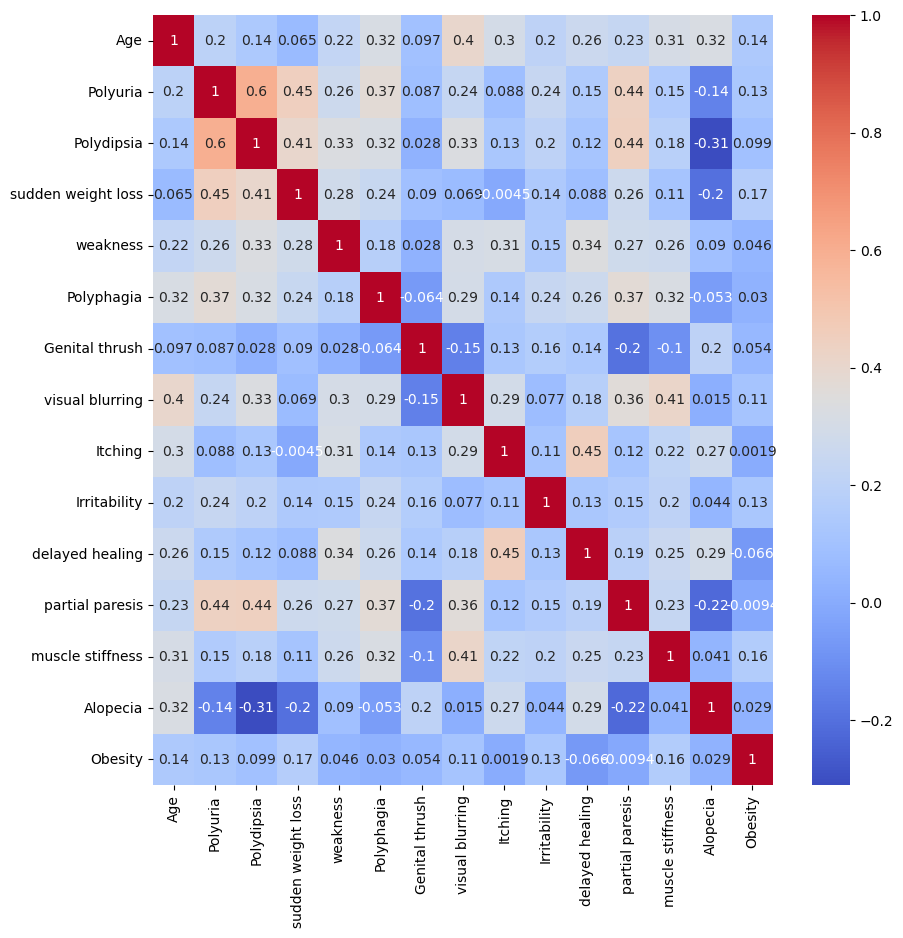

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('~/workspace/datasets/diabetes_data_upload_kaggle_early_stage.csv')
df = data.copy()

# change the name of the 'class' column to 'Class'
df.rename(columns={'class': 'Class'}, inplace=True)

# plot the number of patients with symptoms and diabetes
symptoms = []
diabetes = []
for i in range (2, 16):
    symptoms.append(len(df[df[df.columns[i]] == 'Yes']))
    diabetes.append(len(df[df[df.columns[i]] == 'Yes'][df[df.columns[16]] == 'Positive']))

plt.figure(figsize=(10, 5))
plt.bar(df.columns[2:16], symptoms, color='blue', label='No Diabetes')
plt.bar(df.columns[2:16], diabetes, color='red', label='Diabetes')
plt.xticks(rotation=90)
plt.legend()
plt.show()
df.describe()

# plot the distribution of every symptom
for i in range(2, 16):
    sns.countplot(x=df.iloc[:, i], hue=df['Class'])
    plt.show()


# plot the age of patients with and without diabetes
sns.histplot(df, x='Age', hue='Class', multiple='stack', bins=20)
plt.title('Age of Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

# plot the number of patients with diabetes and without diabetes
print(df.Class.value_counts())
df.Class.value_counts().plot(kind="bar", title="Number of patients with and without diabetes")

# change 'No' to 0 and 'Yes' to 1 in columns 2-15
df.iloc[:, 2:16] = df.iloc[:, 2:16].replace({'No': 0, 'Yes': 1})

# change 'Negative' to 0 and 'Positive' to 1 in column 16

# plot the correlation between the features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()




Counter({1: 320, 0: 200})
Counter({1: 320, 0: 320})


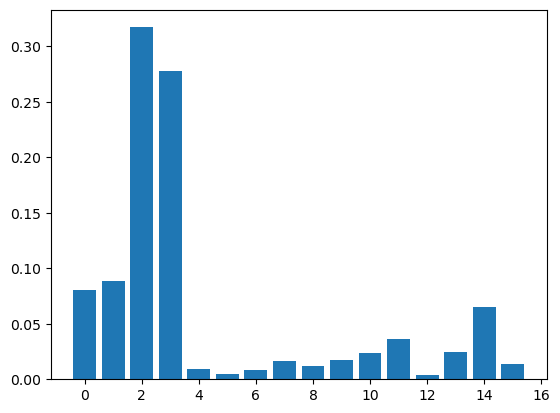

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('~/workspace/datasets/diabetes_data_upload_kaggle_early_stage.csv')
df = data.copy()

# replace 'Male' with 1 and 'Female' with 0
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

# replace 'Yes' with 1 and 'No' with 0
df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']] = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']].replace('Yes', 1)
df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']] = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']].replace('No', 0)

# replace 'Positive' with 1 and 'Negative' with 0
df['class'] = df['class'].replace('Positive', 1)
df['class'] = df['class'].replace('Negative', 0)

# split the data into X and y
X = df.drop('class', axis = 1)
y = df['class']

# use standard scaler to scale the 'Age' column
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

# convert the data to a dataframe
X = pd.DataFrame(X, columns = df.columns[:-1])

# summarize class distribution
counter = Counter(y)
print(counter)

# over-sampling using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

X.head()